# ARIMA CODE ALONG (SELF)

In [1]:
pwd

'C:\\Users\\hp\\Python-for-Finance-Repo-master\\08-Time-Series-Analysis'

In [2]:
ls 

 Volume in drive C is Windows
 Volume Serial Number is 0412-F4F3

 Directory of C:\Users\hp\Python-for-Finance-Repo-master\08-Time-Series-Analysis

21-Sep-17  09:54 PM    <DIR>          .
21-Sep-17  09:54 PM    <DIR>          ..
21-Sep-17  09:54 PM    <DIR>          .ipynb_checkpoints
09-Aug-17  01:00 AM            92,531 1-Introduction-to-Statsmodels.ipynb
09-Aug-17  01:00 AM            86,845 2-EWMA-Exponentially-weighted-moving-average.ipynb
09-Aug-17  01:00 AM           133,591 3-ETS-Decomposition.ipynb
09-Aug-17  01:00 AM           727,015 4-ARIMA-and-Seasonal-ARIMA.ipynb
09-Aug-17  01:00 AM             2,131 airline_passengers.csv
21-Sep-17  09:53 PM                72 ARIMA CODE ALONG (SELF).ipynb
19-Sep-17  08:39 PM            85,162 Intro to Statsmodels (self).ipynb
09-Aug-17  01:00 AM             2,478 monthly-milk-production-pounds-p.csv
               8 File(s)      1,129,825 bytes
               3 Dir(s)  334,500,216,832 bytes free


In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import statsmodels.api as sm

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [11]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [12]:
df.columns =['Month','Milk in Pounds per Cow']

In [13]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [14]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [15]:
df.drop(168,axis=0,inplace=True)

In [16]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [17]:
df['Month'] = pd.to_datetime(df['Month'])

In [18]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [21]:
df.set_index('Month',inplace=True)

In [22]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


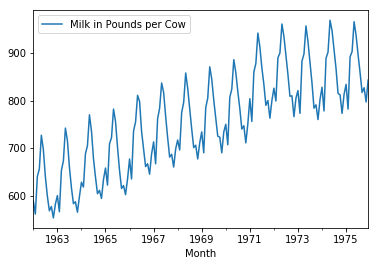

In [25]:
df.plot();

In [26]:
time_series = df['Milk in Pounds per Cow']

In [27]:
type(time_series)

pandas.core.series.Series

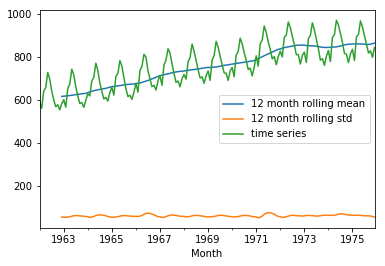

In [31]:
time_series.rolling(12).mean().plot(label='12 month rolling mean')
time_series.rolling(12).std().plot(label='12 month rolling std')
time_series.plot(label='time series')
plt.legend();